In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [2]:
file_location = "../data/raw/xeno-canto.parquet"
df = pd.read_parquet(file_location)
df.head()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temperature,regnr,auto,dvc,mic,smp
0,347210,Prinia,lepida,,birds,Delicate Prinia,Tero Linjama,Turkey,Göksü delta,36.2944,...,,yes,yes,no,,,no,,,48000
1,773151,Prinia,lepida,lepida,birds,Delicate Prinia,Tora BENZEYEN,Turkey,"Antalya, Konyaaltı, Antalya",36.859,...,On a small marsh path.,yes,yes,no,,,no,iPhone SE,,48000
2,615864,Prinia,lepida,,birds,Delicate Prinia,Cedric Mroczko,Turkey,Yumurtalık Lagünleri Milli Parkı (Halep çamı o...,36.741,...,"High-pass fitered (1000Hz, 6dB). d100 + clippy...",no,no,no,,,no,,,44100
3,595548,Bubo,milesi,,birds,Arabian Eagle-Owl,Micha Luhn,Oman,"Wadi Darbat, Dhofar",17.1024,...,Same individuum as in **XC595546**\r\nA distan...,no,no,no,,,no,,,48000
4,595546,Bubo,milesi,,birds,Arabian Eagle-Owl,Micha Luhn,Oman,"Wadi Darbat, Dhofar",17.1024,...,A distant call in the rocks.\r\norig: 29 s 48...,no,no,no,,,no,,,48000


## Species

First check how many records have an unknown species

In [3]:
df["en"].value_counts()

en
Identity unknown     3853
Red Crossbill        1466
Great Tit            1385
Common Chiffchaff    1380
Common Blackbird     1188
                     ... 
Northern Parula         1
Tennessee Warbler       1
Wilson's Warbler        1
Myrtle Warbler          1
Upland Goose            1
Name: count, Length: 659, dtype: int64

Then check how many species there are that have more than x recordings

In [4]:
species_count_values = {}
for species_count in range(1, df["en"].nunique()):
    species = df["en"].value_counts()
    species = species[species > species_count]
    species_count_values[species_count] = species.count()

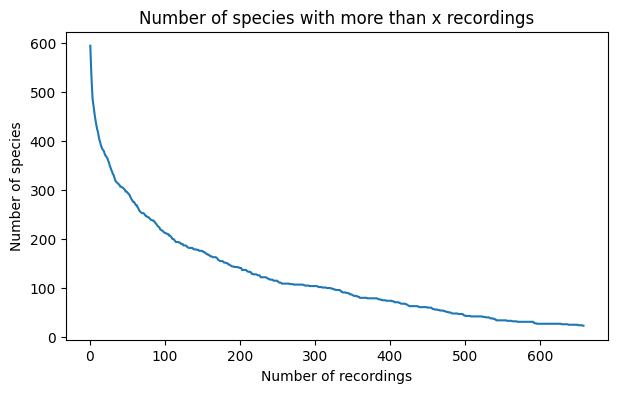

In [5]:
fig, ax  = plt.subplots(1, 1, figsize=(7, 4))

ax.set_title("Number of species with more than x recordings")
ax.set_xlabel("Number of recordings")
ax.set_ylabel("Number of species")
ax.plot(species_count_values.keys(), species_count_values.values())

In [6]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/home/david/miniconda3/envs/dspro1/lib/python3.12/site-packages/ydata_profiling/visualisation/plot.py:429: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df = df[df["en"] != "Identity unknown"]

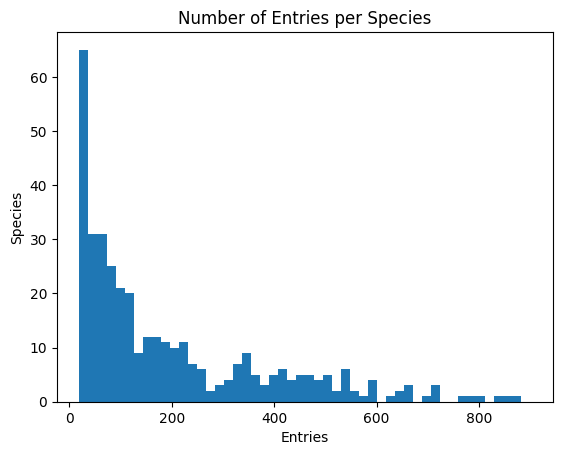

In [8]:
xs = df["en"].value_counts()
bins = 50
plt.hist(xs, range=(20,900), bins=bins)
plt.title("Number of Entries per Species")
plt.xlabel("Entries")
plt.ylabel("Species")
plt.show()

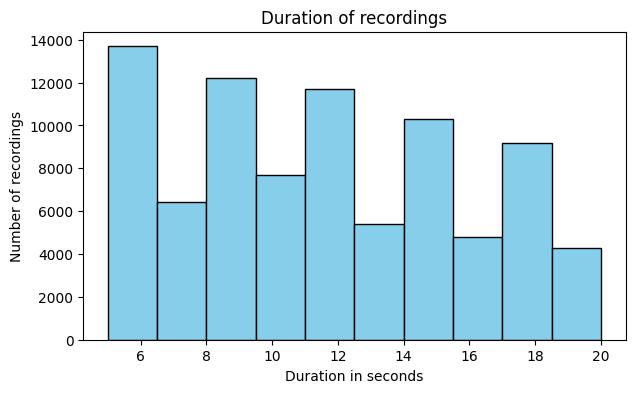

In [9]:
# plot histogram of duration of recordings
recording_length_df = df["length"].str.split(":").str[1].astype(int)

fig, ax  = plt.subplots(1, 1, figsize=(7, 4))
ax.set_title("Duration of recordings")
ax.set_xlabel("Duration in seconds")
ax.set_ylabel("Number of recordings")
ax.hist(recording_length_df, bins=10, color="skyblue", edgecolor="black");